In [53]:
import sys 
sys.path.append('/host/d/Github/')
import os
import torch
import numpy as np
import nibabel as nb
import CT_registration_diffusion.functions_collection as ff
import CT_registration_diffusion.Build_lists.Build_list as Build_list

import torch
from torch.utils.data import Dataset


In [42]:
# change the excel path to your own path
patient_list_spreadsheet = os.path.join('/host/d/Data/4DCT/Patient_lists/ct_list.xlsx')
build_sheet =  Build_list.Build(patient_list_spreadsheet)

batch_list, dataset_id_list, case_id_list, image_folder_list = build_sheet.__build__(batch_list = [0])

print('length of dataset_id_list:', len(dataset_id_list))
print('example of dataset_id_list:', dataset_id_list[1], ' corresponding case_id:', case_id_list[1], ' image_folder:', image_folder_list[1])

length of dataset_id_list: 16
example of dataset_id_list: DIR_LAB  corresponding case_id: Case2  image_folder: /host/d/Data/4DCT/DIR_LAB/Case2/cropped_image


In [ ]:
# generator

class Dataset_4DCT(Dataset):
    def __init__(
        self,
        image_folder_list,
        cutoff_range = [-200,250], # default cutoff range for CT images
        shuffle = False,
      
    ):
        super().__init__()
        self.image_folder_list = image_folder_list
        self.shuffle = shuffle
        self.background_cutoff = cutoff_range[0]
        self.maximum_cutoff = cutoff_range[1]

        self.num_files = len(image_folder_list)

        self.index_array = self.generate_index_array()
        self.current_moving_file = None
        self.current_moving_data = None
        self.current_fixed_file = None
        self.current_fixed_data = None
       

    def generate_index_array(self): 
        np.random.seed()
        index_array = []
        
        if self.shuffle == True:
            f_list = np.random.permutation(self.num_files)
        else:
            f_list = np.arange(self.num_files)

        index_array = [[f] for f in f_list]
        return index_array

    def __len__(self):
       return self.num_files
    

    # def load_file(self, filename = None, preload_data = None):
    #     if self.preload == False:
    #         ii = nb.load(filename).get_fdata()
    #     else:
    #         ii = preload_data
    
    #     # do histogram equalization first
    #     if self.histogram_equalization == True: 
    #         ii = Data_processing.apply_transfer_to_img(ii, self.bins, self.bins_mapped)
    #     # cutoff and normalization
    #     ii = Data_processing.cutoff_intensity(ii,cutoff_low = self.background_cutoff, cutoff_high = self.maximum_cutoff)
    #     ii = Data_processing.normalize_image(ii, normalize_factor = self.normalize_factor, image_max = self.maximum_cutoff, image_min = self.background_cutoff ,invert = False)
    #     ii = Data_processing.crop_or_pad(ii, [self.image_size[0], self.image_size[1], ii.shape[2]], value= np.min(ii))

    #     return ii
        
    def __getitem__(self, index):

        file_num = self.index_array[index]
        current_image_folder = self.image_folder_list[file_num][0]
        

        # randomly pick two time frames
        timeframes = ff.find_all_target_files(['*'], current_image_folder)
        # print(timeframes)

        t1, t2 = np.random.choice(len(timeframes), size=2, replace=False)
        moving_file = timeframes[t1]
        fixed_file = timeframes[t2]
        print('in this folder, I pick moving file:', moving_file, ' fixed file:', fixed_file)

        # load
        moving_image = nb.load(moving_file).get_fdata()
        fixed_image = nb.load(fixed_file).get_fdata()
        # print(' moving image shape:', moving_image.shape, ' fixed image shape:', fixed_image.shape)

        # preprocess if needed
        # cutoff 

        # normalization to [-1,1]

        # augmentation if needed
        # rotate [-10,10] degrees
        # translate [-10,10] pixels



        return moving_image, fixed_image
    
    def on_epoch_end(self):
        print('now run on_epoch_end function')
        self.index_array = self.generate_index_array()
    



In [55]:
generator = Dataset_4DCT(
    image_folder_list = image_folder_list,
    shuffle = True)

in this folder, I pick moving file: /host/d/Data/4DCT/DIR_LAB/Case8/cropped_image/img_2.nii.gz  fixed file: /host/d/Data/4DCT/DIR_LAB/Case8/cropped_image/img_5.nii.gz
moving image shape: (256, 256, 128)  fixed image shape: (256, 256, 128)


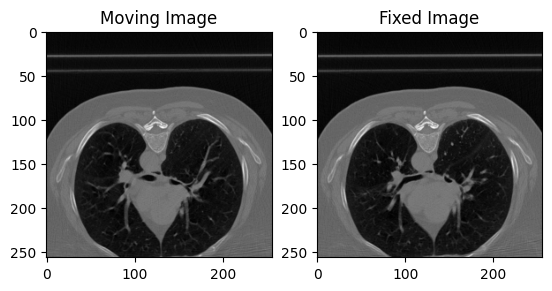

In [ ]:
for i in range(len(generator)):
    moving_image, fixed_image = generator[i]
    print('moving image shape:', moving_image.shape, ' fixed image shape:', fixed_image.shape)
    print('data range of moving image:', np.min(moving_image), np.max(moving_image))

    # i want to plot side by side
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(moving_image[:, :, moving_image.shape[2]//2].T, cmap='gray')
    axs[0].set_title('Moving Image')
    axs[1].imshow(fixed_image[:, :, fixed_image.shape[2]//2].T, cmap='gray')
    axs[1].set_title('Fixed Image')
    plt.show()
    break
   

In [ ]:
image = nb.load()

# cuda实现

# put image into cuda

# 要写一个Spatial transorm module]
# 我要实现的是,image向左平移10个pixel



# 我要实现的是,image旋转绕着z轴 90


